In [3]:
import pandas as pd
import numpy as np

import re
import string
import os

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

In [4]:
!wget https://github.com/mayanksinghkgp/NLP_Resources/raw/main/Fine_tuning_BERT_twitter/data/train.csv

--2021-12-18 12:15:53--  https://github.com/mayanksinghkgp/NLP_Resources/raw/main/Fine_tuning_BERT_twitter/data/train.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mayanksinghkgp/NLP_Resources/main/Fine_tuning_BERT_twitter/data/train.csv [following]
--2021-12-18 12:15:53--  https://raw.githubusercontent.com/mayanksinghkgp/NLP_Resources/main/Fine_tuning_BERT_twitter/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987711 (965K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 964.56K  --.-KB/s    in 0.05s   

2021-12-18 12:15:53 (20.7 MB/s) -

In [5]:
tweet = pd.read_csv('train.csv')

In [6]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
tweet.shape

(7613, 5)

In [8]:
tweet.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


### EDA

In [10]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 80

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Disaster: Real or Not')

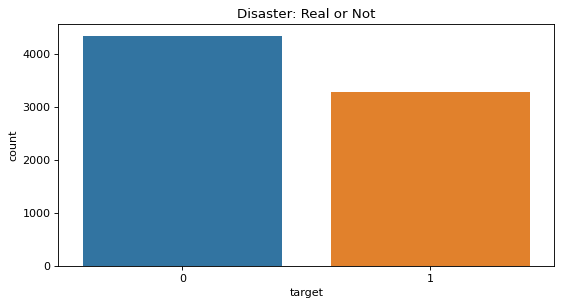

In [11]:
sns.countplot(tweet.target)
plt.title('Disaster: Real or Not')

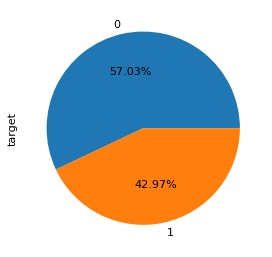

In [12]:
tweet.target.value_counts().plot.pie(autopct = '%1.2f%%')

### Character distribution

In [ ]:
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
# import preprocess_kgptalkie as ps

In [14]:
tweet = ps.get_basic_features(tweet)

In [15]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


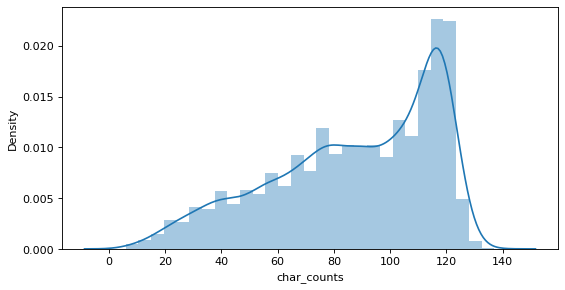

In [16]:
sns.distplot(tweet['char_counts'])

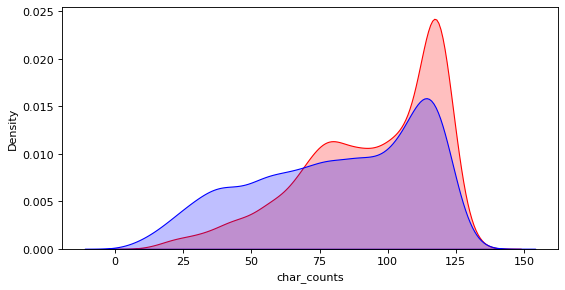

In [17]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], shade=True, color='blue')

### Number of Words, Average Words Length, and Stop words Distribution in Tweets

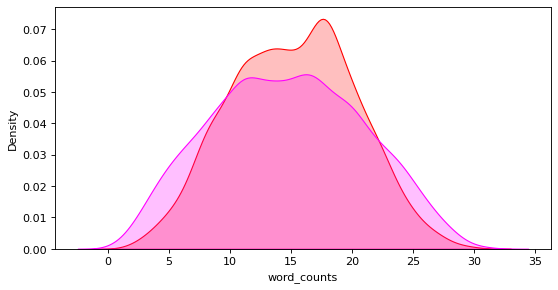

In [18]:
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], shade=True, color='magenta')

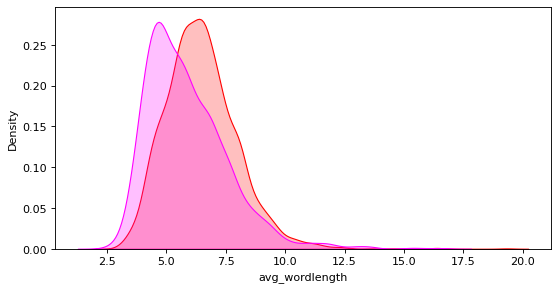

In [19]:
sns.kdeplot(tweet[tweet['target']==1]['avg_wordlength'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['avg_wordlength'], shade=True, color='magenta')

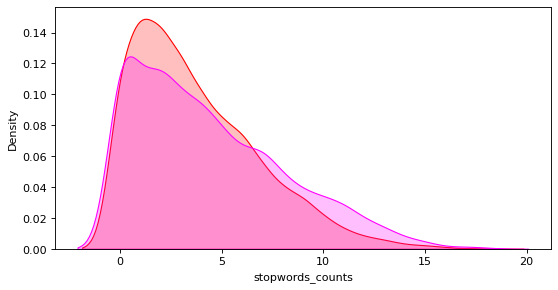

In [20]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], shade=True, color='red')
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], shade=True, color='magenta')

### Most & Least common words

In [21]:
freqs = ps.get_word_freqs(tweet, 'text')

In [24]:
top20 = freqs[:20]

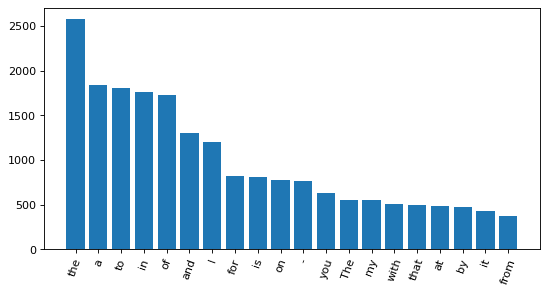

In [25]:
plt.bar(top20.index, top20.values)
plt.xticks(rotation=70)
plt.show()

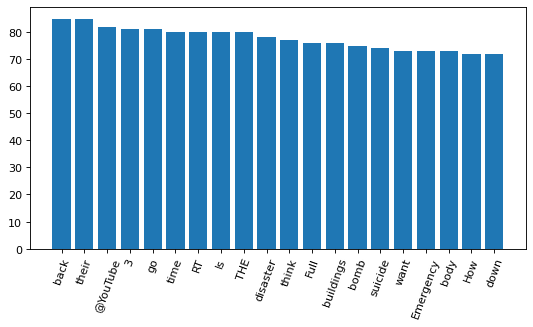

In [26]:
top20 = freqs[100:120]
plt.bar(top20.index, top20.values)
plt.xticks(rotation=70)
plt.show()

In [27]:
least20 = freqs[-20:]
least20

delaying                                              1
??????????????????????????????????????????????????    1
http://t.co/MUdgU1pUNS                                1
#Ashville                                             1
acquiesce                                             1
rages                                                 1
@kirkmin                                              1
'Since1970the                                         1
#Kodiak                                               1
@niamhosullivanx                                      1
@TheGreenParty                                        1
Rl                                                    1
@lindsay_wynn3                                        1
#baby                                                 1
*she                                                  1
karnal                                                1
http://t.co/2RAcaiVFfq                                1
#aintsheperty                                   

In [28]:
bigram = ps.get_ngram(tweet, 'text', ngram_range=2)

In [31]:
bigram[100:120] #preprocessing not doen yet, so there is noise

[('ûï emergency', 68395),
 ('ûï dylanmcclure55', 68394),
 ('ûï bbcwomanshour', 68393),
 ('ûï bbcengland', 68392),
 ('ûï based_georgie', 68391),
 ('ûï _keits', 68390),
 ('ûªve seen', 68389),
 ('ûªve just', 68388),
 ('ûªve ever', 68387),
 ('ûªve been', 68386),
 ('ûªt watch', 68385),
 ('ûªt warned', 68384),
 ('ûªt want', 68383),
 ('ûªt wanna', 68382),
 ('ûªt wait', 68381),
 ('ûªt say', 68380),
 ('ûªt research', 68379),
 ('ûªt let', 68378),
 ('ûªt know', 68377),
 ('ûªt govern', 68376)]

In [32]:
def get_clean(x):
    x = str(x).lower().replace('\\', ' ').replace('_', ' ').replace('.', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = ps.remove_dups_char(x)
    return x

In [33]:
tweet['text'] = tweet['text'].apply(lambda x: get_clean(x))

In [34]:
tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [ ]:
ps.get_ngram(tweet, 'text', ngram_range=2)

### Words visualization for disaster tweets

In [36]:
real = ps.get_word_freqs(tweet[tweet['target']==1], 'text')
real = ' '.join(real.index)
real

'httpt the in of a to and is on for i at by from it that with not you after this fire are was as have my news httpst over up more via an disaster were be people california suicide no has police who when but been like killed do 2 will just hiroshima than so out fires storm crash families we train now about into emergency s your buildings bomb there all what mh370 two am nuclear they attack video wildfire accident get new bombing one how prime minister burning northern legionnaires dead me bomber homes if some war car atomic still obama he fatal years off may us forest collapse retweet city watch debris first malaysia japan today 1 latest man or mass severe water near had earthquake those confirmed before would found oil spill world army down floods 70 warning under home injured derailment wreckage could 3 evacuation outbreak weather 4 thunderstorm being 40 migrants saudi our old flooding investigators can missing say during flood bridge time their back state death mosque suspect her isl

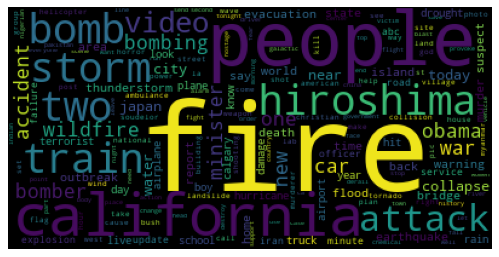

In [37]:
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

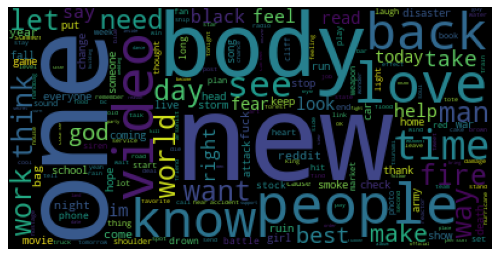

In [38]:
# not a disaster plot

nreal = ps.get_word_freqs(tweet[tweet['target']==0], 'text')
nreal = ' '.join(nreal.index)
word_cloud = WordCloud(max_font_size=100).generate(nreal)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Classification with TFIDF and SVM

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import LinearSVC

plt.style.use('ggplot')

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from tensorflow.keras.optimizers import Adam

In [39]:
text = tweet['text']
y = tweet['target']

In [43]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [44]:
X.shape

(7613, 22545)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [46]:
def run_SVM(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print()
  print('Classification Report')
  print(classification_report(y_test, y_pred))

In [48]:
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.83      0.69      0.75       654

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



### Word2Vec & SVM

In [49]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=538bf4ac88ce31c83f34a6b95923185d21547ce835cd8915d76a9670e1baac71
  Stored in directory: /tmp/pip-ephem-wheel-cache-ou3bjpcq/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [50]:
import spacy
import en_core_web_lg

In [51]:
nlp = en_core_web_lg.load()

In [52]:
def get_vec(x):
  doc = nlp(x)
  vec = doc.vector
  return vec

In [53]:
tweet['vec'] = tweet['text'].apply(lambda x: get_vec(x))

In [54]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.26623327, 0.05843069, -0.1404636, -0.05265..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.014817425, -0.09212343, -0.10716944, -0.33..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,"[0.0059339865, 0.016337818, -0.105279535, -0.0..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,"[-0.13400537, 0.25267026, 0.09032763, -0.16645..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,"[-0.06394094, -0.01423019, 0.0063574947, 0.071..."


In [55]:
X = tweet['vec'].to_numpy()
X = X.reshape(-1, 1)

In [56]:
X.shape

(7613, 1)

In [57]:
X = np.concatenate(np.concatenate(X, axis=0), axis=0).reshape(-1, 300)

In [58]:
X.shape

(7613, 300)

In [59]:
y = tweet['target']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [61]:
%%time
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       869
           1       0.81      0.71      0.76       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523

CPU times: user 5.18 s, sys: 40.8 ms, total: 5.22 s
Wall time: 5.95 s
